# **Projeto: Admissão no Mestrado**


### **Disciplina:** Inteligência Artificial
### **Alunas:** Ana Lívia Meira e Larissa Maciel Belarmino de Melo
---

Grande parte dos alunos egressos de cursos superiores tem como objetivo ingressar em algum programa de pós-graduação a fim de se tornarem Mestres em suas respectivas áreas do conhecimento. O processo de seleção realizado em cada universidade faz uso de uma quantidade considerável de parâmetros, alguns deles bastante subjetivos. Sendo assim, um modelo baseado em aprendizado de máquina pode ser de grande importância tanto para o corpo docente envolvido na seleção como para os alunos que desejam participar do processo.

Dessa forma, esse projeto utiliza Machine Learning para prever a aprovação de candidatos em programas de pós-graduação. Foram usados ​​dois modelos: Regressão Logística e uma Rede Neural Artificial (RNA). O projeto inclui análise exploratória dos dados, ajuste de hiperparâmetros da RNA e avaliação dos modelos usando matriz de confusão, acurácia e precisão.

# Análise Exploratória

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Admission_Predict.csv')
df.shape

(400, 9)

In [ ]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [ ]:
df.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

In [ ]:
df.drop('Serial No.', axis=1, inplace=True)

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

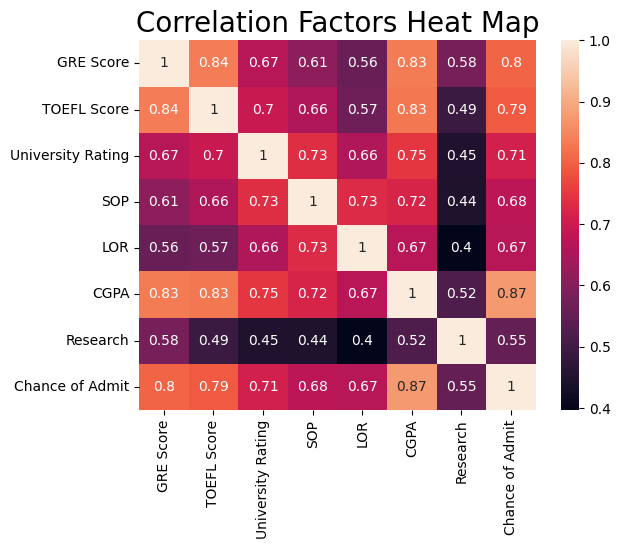

In [ ]:
# vamos visualizar o mapa de calor de correlação entre os coeficientes

sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

Podemos ver que as colunas que mais contribuem para a chance de admissão são: CGPA, GRE score e TOELF score

In [ ]:
# VISUALIZANDO CGPA INDIVIDUALMENTE

In [ ]:
CGPA = pd.DataFrame(df['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,400.000000
mean,8.598925
std,0.596317
min,6.800000
25%,8.170000
50%,8.610000
75%,9.062500
max,9.920000


<ipython-input-60-a5a2778118ff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CGPA).set_title('PLOT DE DISTRIBUIÇÃO DO CGPA', size='20')


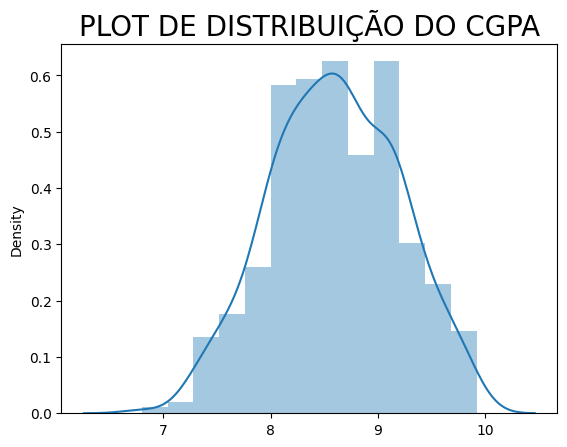

In [ ]:
sns.distplot(CGPA).set_title('PLOT DE DISTRIBUIÇÃO DO CGPA', size='20')
plt.show()

In [ ]:
# VISUALIZANDO GRE INDIVIDUALMENTE

In [ ]:
GRE = pd.DataFrame(df['GRE Score'], columns=['GRE Score'])
GRE.describe()

,GRE Score
count,400.000000
mean,316.807500
std,11.473646
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


<ipython-input-63-9d9de0018298>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GRE).set_title('PLOT DE DISTRIBUIÇÃO DO GRE', size='20')


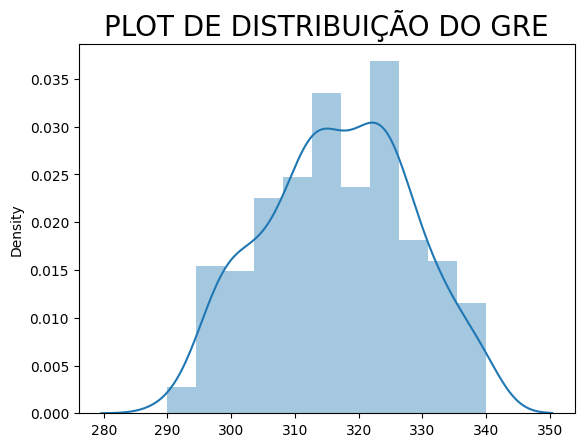

In [ ]:
sns.distplot(GRE).set_title('PLOT DE DISTRIBUIÇÃO DO GRE', size='20')
plt.show()

In [ ]:
# VISUALIZANDO TOELF INDIVIDUALMENTE

In [ ]:
TOEFL = pd.DataFrame(df['TOEFL Score'], columns=['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,400.000000
mean,107.410000
std,6.069514
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


<ipython-input-66-78ce8eadff03>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TOEFL).set_title('PLOT DE DISTRIBUIÇÃO DO TOEFL', size='20')


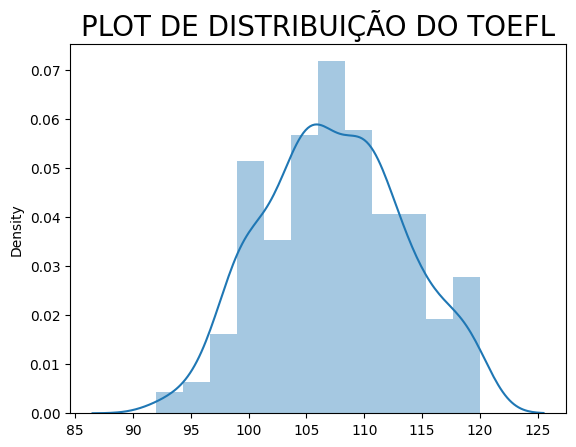

In [ ]:
sns.distplot(TOEFL).set_title('PLOT DE DISTRIBUIÇÃO DO TOEFL', size='20')
plt.show()

In [ ]:
# SOBRE O RANKING DA UNIVERSIDADE

In [ ]:
University_Rating = df.groupby(['University Rating']).count()
University_Rating

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,26,26,26,26,26,26,26
2,107,107,107,107,107,107,107
3,133,133,133,133,133,133,133
4,74,74,74,74,74,74,74
5,60,60,60,60,60,60,60


In [ ]:
University_Rating = University_Rating['SOP']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'SOP': 'Contagem'}, inplace=True, axis=1)
University_Rating
print(University_Rating.sort_values(by=['Contagem'], ascending=False))

                   Contagem
University Rating          
3                       133
2                       107
4                        74
5                        60
1                        26


In [ ]:
# SOBRE LOR -> CARTA DE RECOMENDAÇÃO

In [ ]:
LOR = pd.DataFrame(df.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Contagem'}, axis=1, inplace=True)
print(LOR.sort_values(by=['Contagem'], ascending=False))

     Contagem
LOR          
3.0        85
4.0        77
3.5        73
4.5        45
2.5        39
2.0        38
5.0        35
1.5         7
1.0         1


In [ ]:
# SOBRE SOP -> DECLARAÇÃO DE PROPÓRSITO

In [ ]:
SOP = pd.DataFrame(df.groupby(['SOP']).count()['GRE Score'])
SOP.rename({'GRE Score':'Contagem'}, axis=1, inplace=True)
print(SOP.sort_values(by=['Contagem'], ascending=False))

     Contagem
SOP          
3.5        70
4.0        70
3.0        64
4.5        53
2.5        47
5.0        37
2.0        33
1.5        20
1.0         6


In [ ]:
# SOBRE A PESQUISA -

In [ ]:
RES_Count = df.groupby(['Research']).count()
RES_Count = RES_Count['TOEFL Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'TOEFL Score': 'Contagem'}, axis=1, inplace=True)

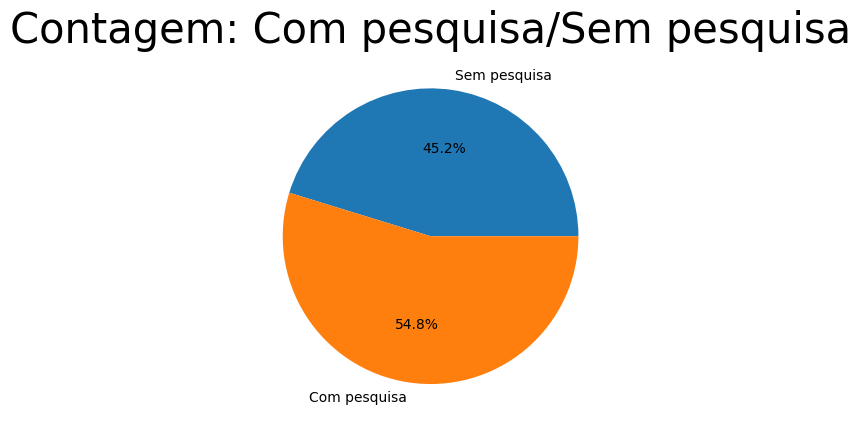

In [ ]:
RES_Count.rename({0: 'Sem pesquisa', 1:'Com pesquisa'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Contagem'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Contagem: Com pesquisa/Sem pesquisa', pad=5, size=30)
plt.show()

# Como nos foi proposto fazer uma Regressao Logística, iremos considerar valores para chance of admit >= 0.7 como high e valores menores que 0.7 como low

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:

def categorize_chance_of_admit(chance):
  if chance >= 0.7:
    return 'high'
  else:
    return 'low'

df_classificacao = df.copy()

df_classificacao['Chance of Admit'] = df_classificacao['Chance of Admit'].apply(categorize_chance_of_admit)


In [ ]:
df_classificacao.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,high
1,324,107,4,4.0,4.5,8.87,1,high
2,316,104,3,3.0,3.5,8.00,1,high
3,322,110,3,3.5,2.5,8.67,1,high
4,314,103,2,2.0,3.0,8.21,0,low


# Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
xt,XT,yt,YT = train_test_split(df_classificacao.iloc[:,:-1],df_classificacao.iloc[:,-1],test_size=0.25)

In [ ]:
LRmodel = LogisticRegression(max_iter=10000)

In [ ]:
LRmodel.fit(xt,yt)
YTP_RL = LRmodel.predict(XT)
# print(f'MSE : {round(mean_squared_error(YT,YTP_RL),5)}')
# print(f'MAE : {round(mean_absolute_error(YT,YTP_RL),5)}')


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy : {accuracy_score(YT,YTP_RL)}')

Accuracy : 0.87


Matriz de Confusão

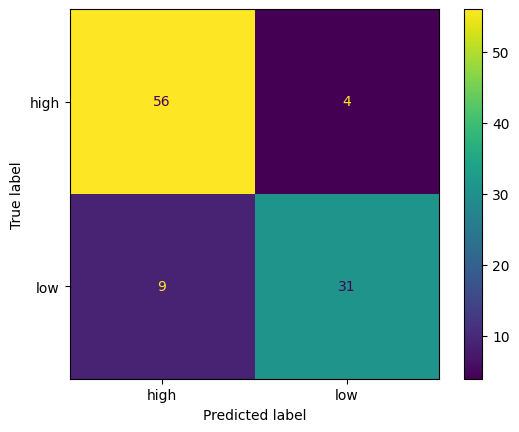

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(YT, YTP_RL, labels=LRmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LRmodel.classes_)
disp.plot()
plt.show()

# Redes Neurais Para Classificação

In [ ]:
!pip install optuna==3.3.0

In [ ]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# def objective(trial):
#     hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(10,), (50,), (100,), (100, 50)])
#     activation = trial.suggest_categorical('activation', ['tanh', 'relu'])
#     solver = trial.suggest_categorical('solver', ['sgd', 'adam'])
#     alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-2)
#     learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'adaptive'])

#     mlp = MLPClassifier(
#         hidden_layer_sizes=hidden_layer_sizes,
#         activation=activation,
#         solver=solver,
#         alpha=alpha,
#         learning_rate=learning_rate,
#         max_iter=10000
#     )

#     # retorna a média da validação cruzada com 3 folds
#     return cross_val_score(mlp, xt, yt, n_jobs=-1, cv=3).mean()

# study = optuna.create_study(direction='maximize') # cria um estudo que maximize a função "objective"
# study.optimize(objective, n_trials=100) # faz 100 tentativas, buscando a melhor confinguração (ou seja: de maior cross_val_score)

# print(study.best_params)

Para definir quais os melhores hiperparâmetros, dicidimos fazer testes com  com o optuna, uma biblioteca de otimização de hiperparâmetros para machine learning, nos temos que os melhores hiperparâmetros para esse problema são:

'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005157345095084711, 'learning_rate': 'constant'

In [ ]:
rede_neural_mestrado = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', alpha= 0.0005157345095084711, learning_rate='constant')
rede_neural_mestrado.fit(xt,yt)

MLPClassifier(activation='tanh', alpha=0.0005157345095084711,
              hidden_layer_sizes=(100, 50))

Aqui criamos uma rede neural do tipo Perceptron Multi Camadas: não estamos mostrando as mensagens de progresso do treinamento;temos apenas duas camadas ocultas com 100 e 50 neurônios; definimos uma função de ativação tangente hiperbólica e o algoritmo de otimização "adam"; além de ter um alpha (penalidade para grandes pesos de 0.0.0017649265325195452) e uma política de aprendizado constante (permanece a mesma durante todo o treinamento).

In [ ]:
YTP_RN = rede_neural_mestrado.predict(XT)
print(f'Accuracy : {accuracy_score(YT,YTP_RN)}')


Accuracy : 0.77


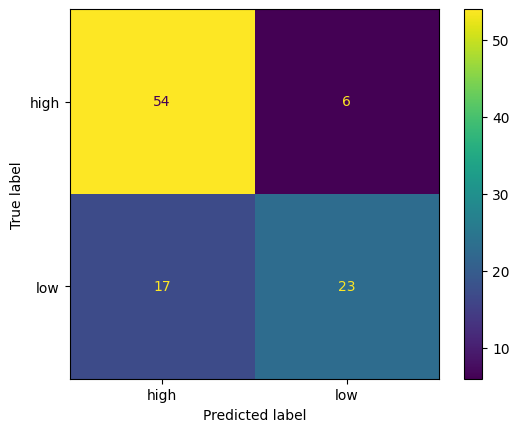

In [ ]:

cm = confusion_matrix(YT, YTP_RN, labels=LRmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LRmodel.classes_)
disp.plot()
plt.show()